<a href="https://colab.research.google.com/github/Pooja-2709/House_price_prediction/blob/main/Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# Load Dataset
url = '/content/drive/MyDrive/Self Learning Projects/House_price_prediction/Housing.csv'
data = pd.read_csv(url)

In [106]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [107]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [108]:
data.shape

(545, 13)

There are 545 row and 13 columns present in the dataset


In [109]:
# Checking information about the dataset using info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [110]:
# Checking duplicated rows count
data.duplicated().sum()

0

In [111]:
# Checking missing values/null values count for each column
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [112]:
# Dataset Columns
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [113]:
# Dataset Describe (all columns included)
data.describe().round(2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [114]:
# check all the unique values
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

<ipython-input-115-1081ca1774b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


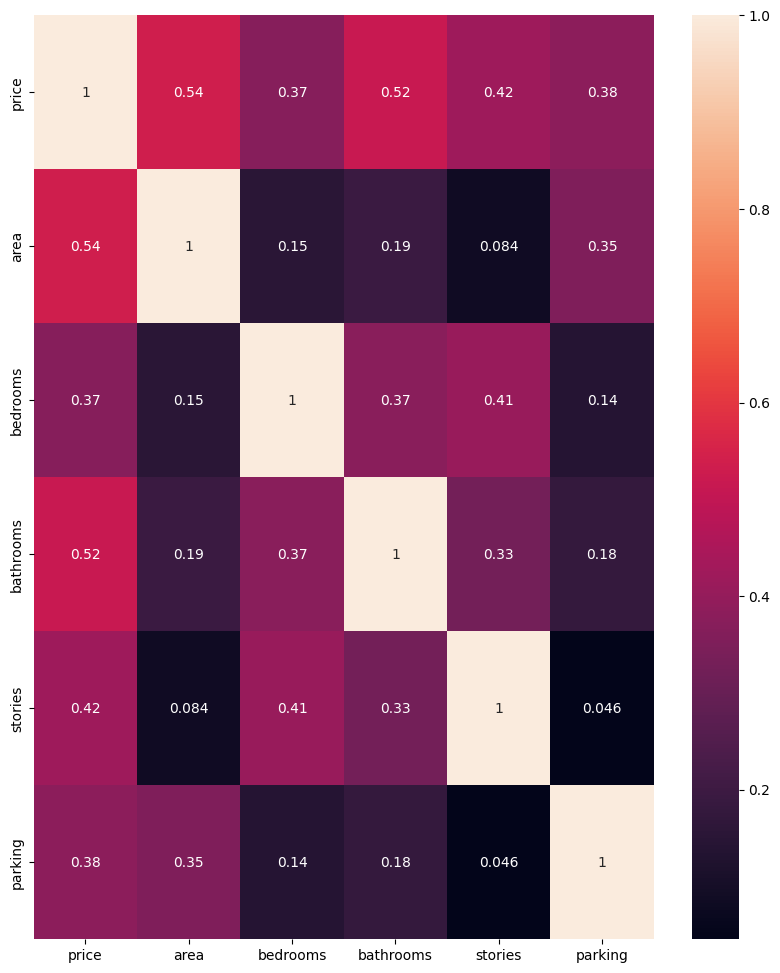

In [115]:
corr = data.corr()
plt.figure(figsize= (10,12))
sns.heatmap(corr, annot=True)
plt.show()

From the above graph we can see that there is not multicollinearity present in our data set, So we don't need to remove the variable


Skewness: 1.2122388370279802
Kurtosis: 1.9601302314151994


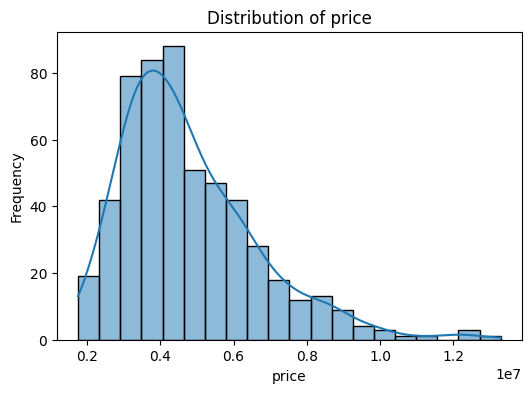

Skewness: 1.321188343153483
Kurtosis: 2.7514801872608086


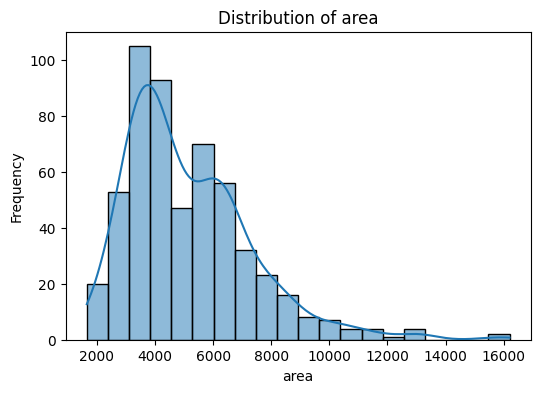

Skewness: 0.49568394074553473
Kurtosis: 0.7283228752894284


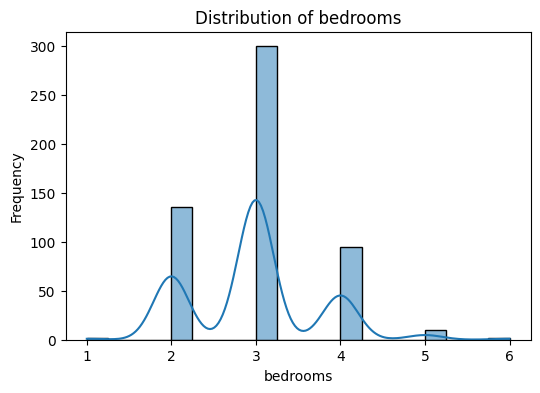

Skewness: 1.5892635781317528
Kurtosis: 2.164856463809789


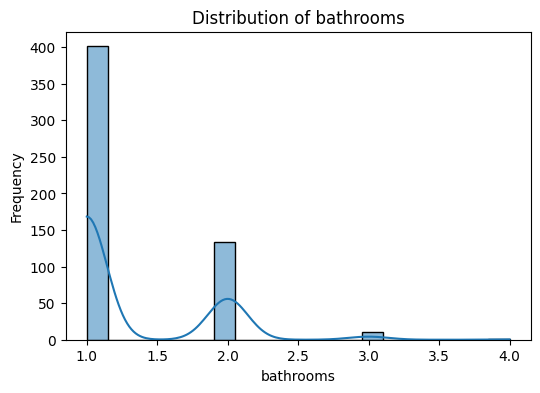

Skewness: 1.0820882904085742
Kurtosis: 0.6794040860082613


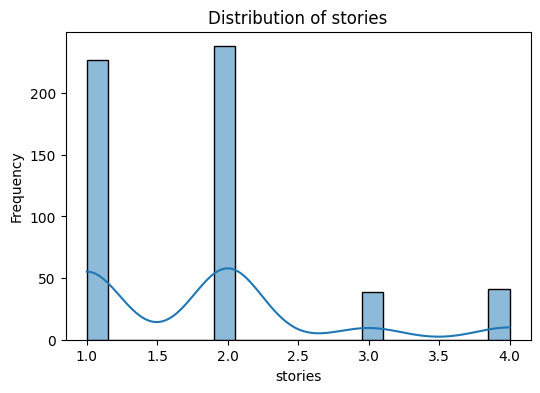

Skewness: 0.8420623343734072
Kurtosis: -0.5730625231147228


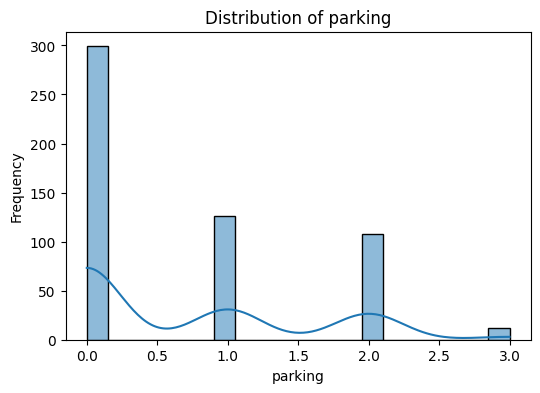

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric variables
numeric_columns = data.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=20, kde=True)
    skewness = data[col].skew()
    kurtosis = data[col].kurt()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    print('Skewness:', skewness)
    print('Kurtosis:', kurtosis)
    plt.show()


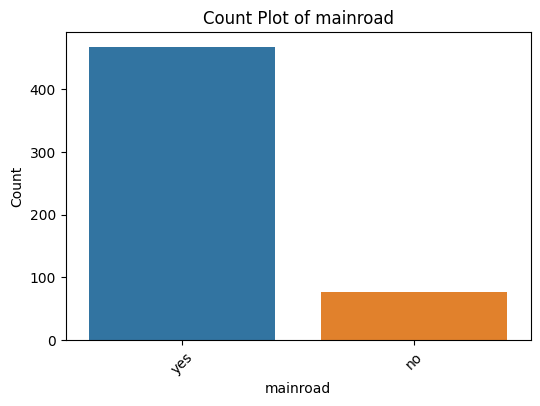

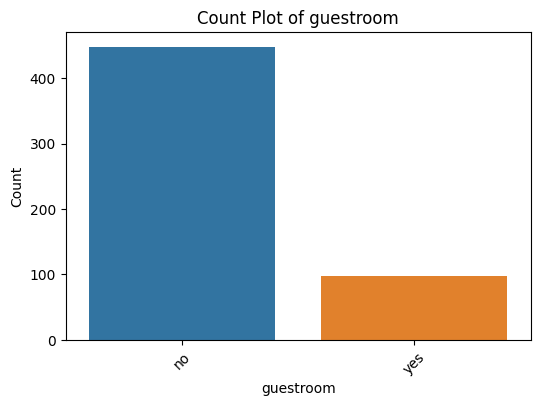

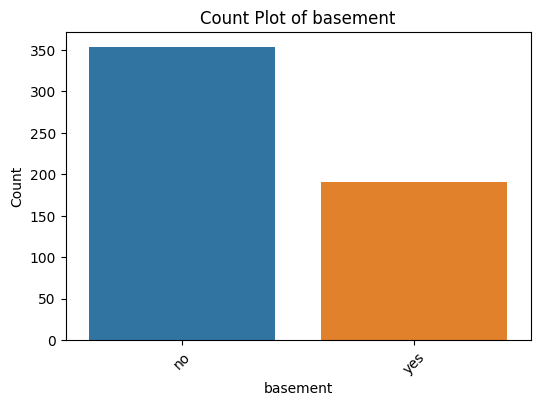

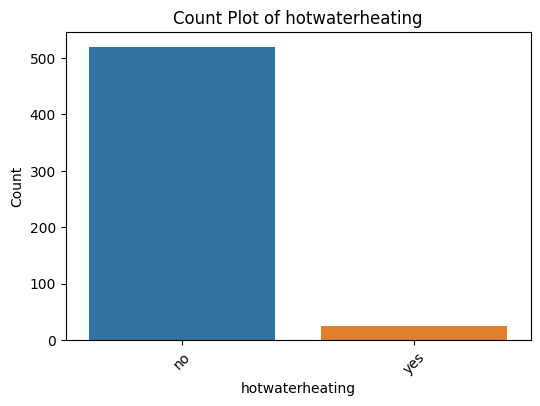

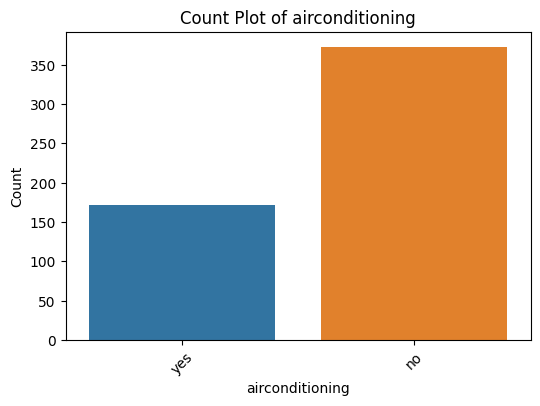

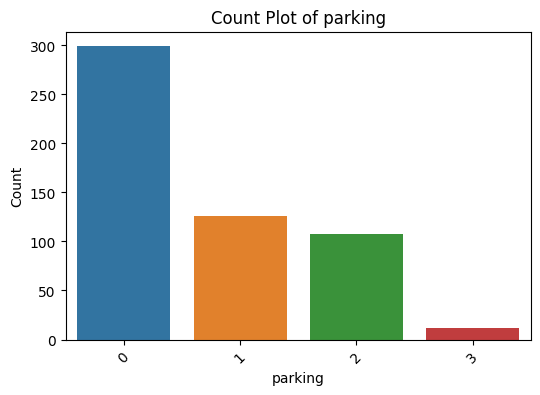

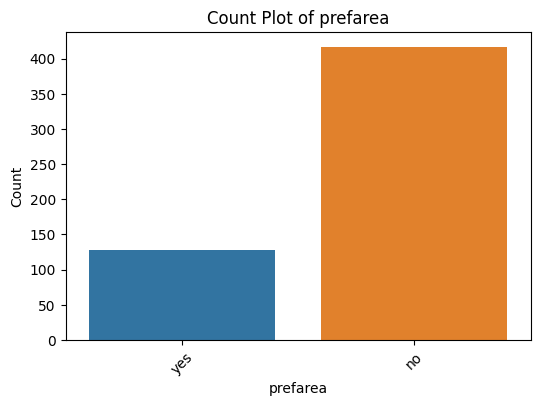

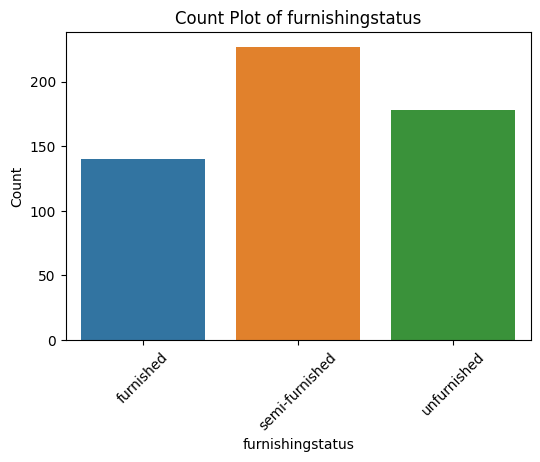

In [117]:
categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"]

# Create count plots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)



*   From the above we can clearly see the people are more likely to purchase the house which are present on Main Road
*   People are more likely to purchase semi furnished flat followed by unfurnished and furnished



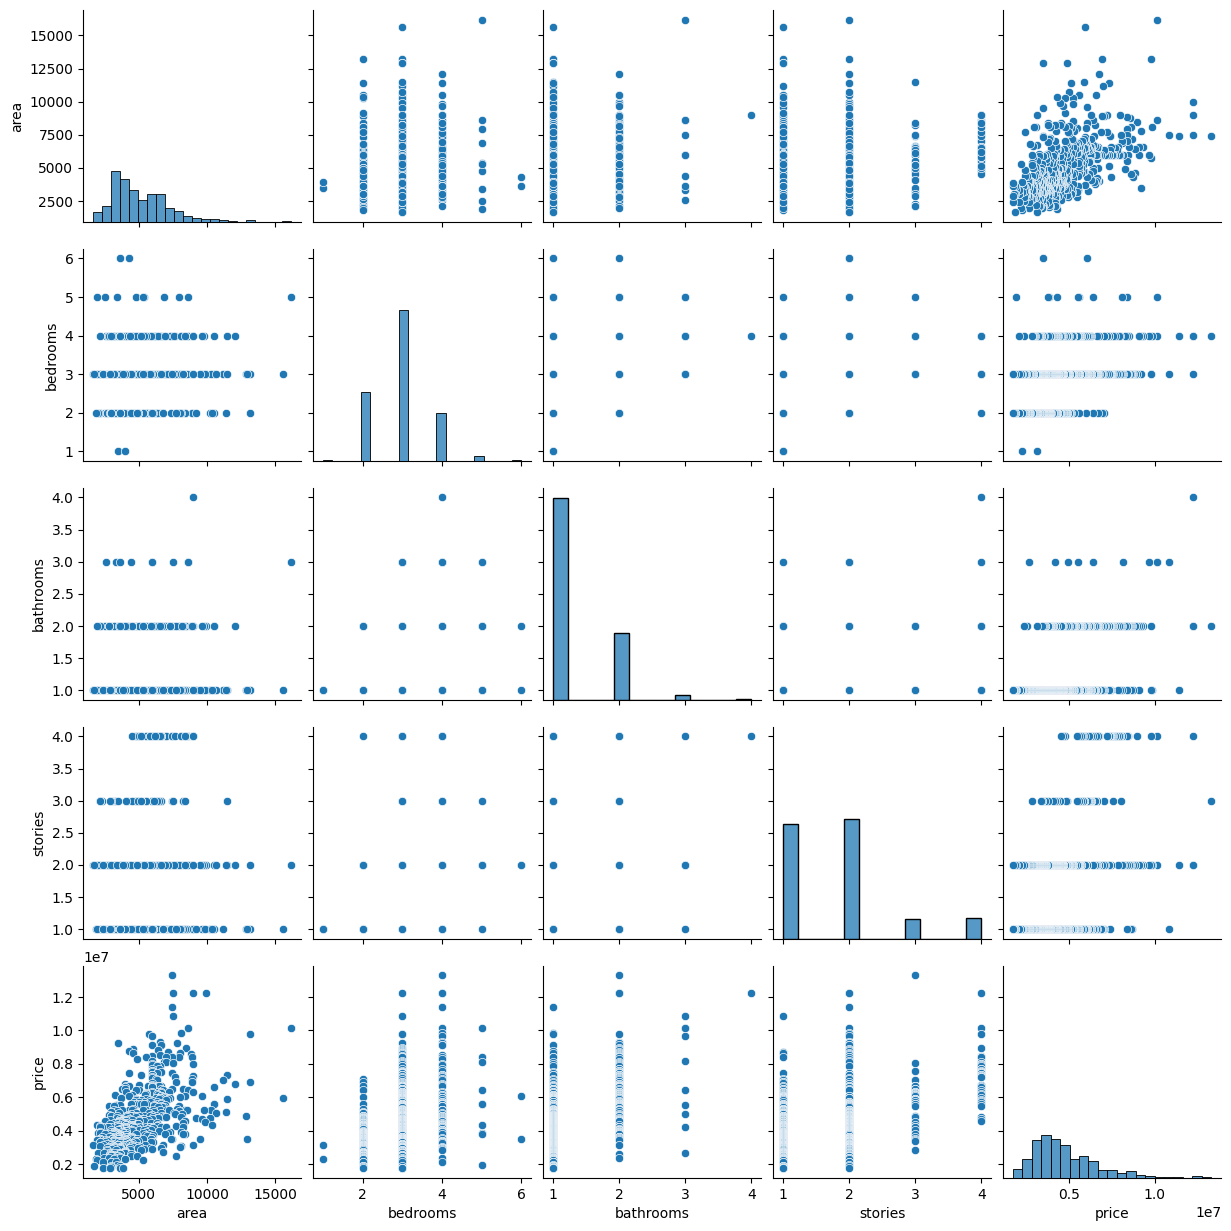

In [118]:
sns.pairplot(data, vars=["area", "bedrooms", "bathrooms", "stories", "price"])
plt.show()

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


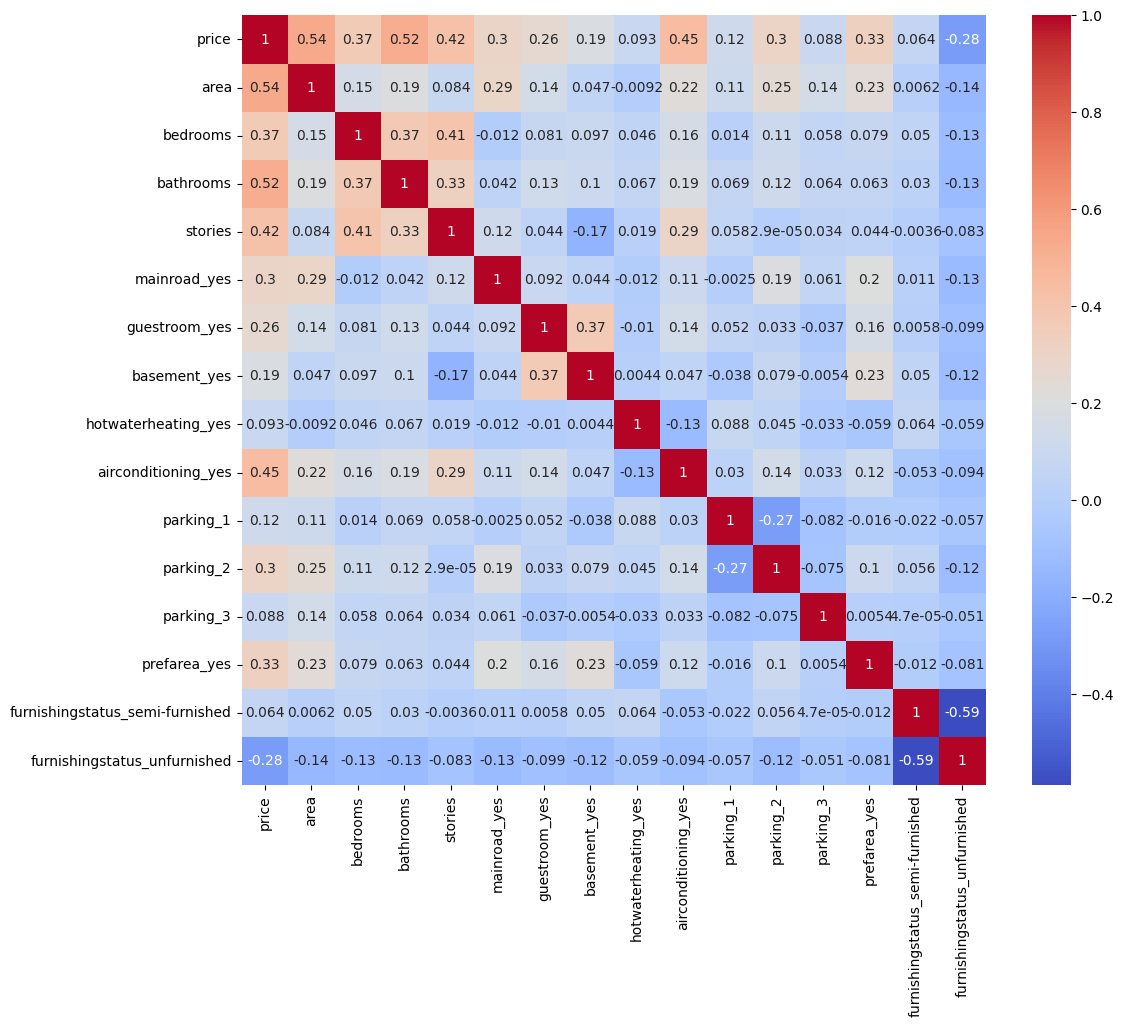

In [120]:
import numpy as np
import pandas as pd  # You need to import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numerical values (e.g., one-hot encoding)
categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad_yes                     545 non-null    uint8
 6   guestroom_yes                    545 non-null    uint8
 7   basement_yes                     545 non-null    uint8
 8   hotwaterheating_yes              545 non-null    uint8
 9   airconditioning_yes              545 non-null    uint8
 10  parking_1                        545 non-null    uint8
 11  parking_2                        545 non-null    uint8
 12  parking_3                        545 non-null    u

In [122]:
data.shape

(545, 16)

In [123]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,0,1,0,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,0,0,1,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,0,1,0,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,0,1,0,0,0,0


In [124]:
#Assign the value in X and Y
X = data.drop(columns=['price'], axis=1)
y = np.sqrt(data['price'])


In [125]:
X.shape

(545, 15)

In [126]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,0,1,0,1,0,0
1,8960,4,4,4,1,0,0,0,1,0,0,1,0,0,0
2,9960,3,2,2,1,0,1,0,0,0,1,0,1,1,0
3,7500,4,2,2,1,0,1,0,1,0,0,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,0,1,0,0,0,0


In [127]:
y.head()

0    3646.916506
1    3500.000000
2    3500.000000
3    3494.996423
4    3377.869151
Name: price, dtype: float64

In [128]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'parking_1', 'parking_2', 'parking_3',
       'prefarea_yes', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

**Data Scaling**

In [129]:
features = [i for i in X.columns]


In [130]:
print(features)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking_1', 'parking_2', 'parking_3', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


**Data Scaling**


In [131]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

In this we have different independent features of different scale so we have used standard scalar method to scale our independent features into one scale.

In [132]:
data[features]

,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,0,1,0,1,0,0
1,8960,4,4,4,1,0,0,0,1,0,0,1,0,0,0
2,9960,3,2,2,1,0,1,0,0,0,1,0,1,1,0
3,7500,4,2,2,1,0,1,0,1,0,0,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,0,1,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [134]:
print(X_train.shape)
print(X_test.shape)

(408, 15)
(137, 15)


In [135]:
print(y_train.shape)
print(y_test.shape)

(408,)
(137,)


To train the model we have split the data into train and test using train_test_split method

We have split 75% of our data into train and 25% into test.

**ML Model Implementation**

In [136]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source



In [137]:
#define a function to print Evaluation Matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and y pred with the help of sqrt transformation
  y_sq_test = np.square(y_test)
  y_sq_pred = np.square(y_pred)
  y_sq_train = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_sq_test,y_sq_pred)
  mae=mean_absolute_error(y_sq_test,y_sq_pred)
  rmse = np.sqrt(mse)
  r2_train = r2_score(y_sq_train, y_train_pred)
  r2 = r2_score(y_sq_test,y_sq_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))


  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(18,6))
  plt.plot((y_sq_pred))
  plt.plot((np.array(y_sq_test)))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=18)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  model_score = [mse,mae,rmse,r2_train,r2,r2_adjusted]
  return model_score


In [138]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE','MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

**Model 1 - Linear Regression**

In [139]:
regressor= LinearRegression()

# Initialize an instance of the class
regressor.fit(X_train, y_train)

# Fit the linear regression model to your training data
y_pred_li = regressor.predict(X_test)

MSE : 889688434806.1389
RMSE : 943232.969528811
MAE : 690603.2299043892
Train R2 : 0.6836731556868354
Test R2 : 0.7117470872425362
Adjusted R2 :  0.67601325508252


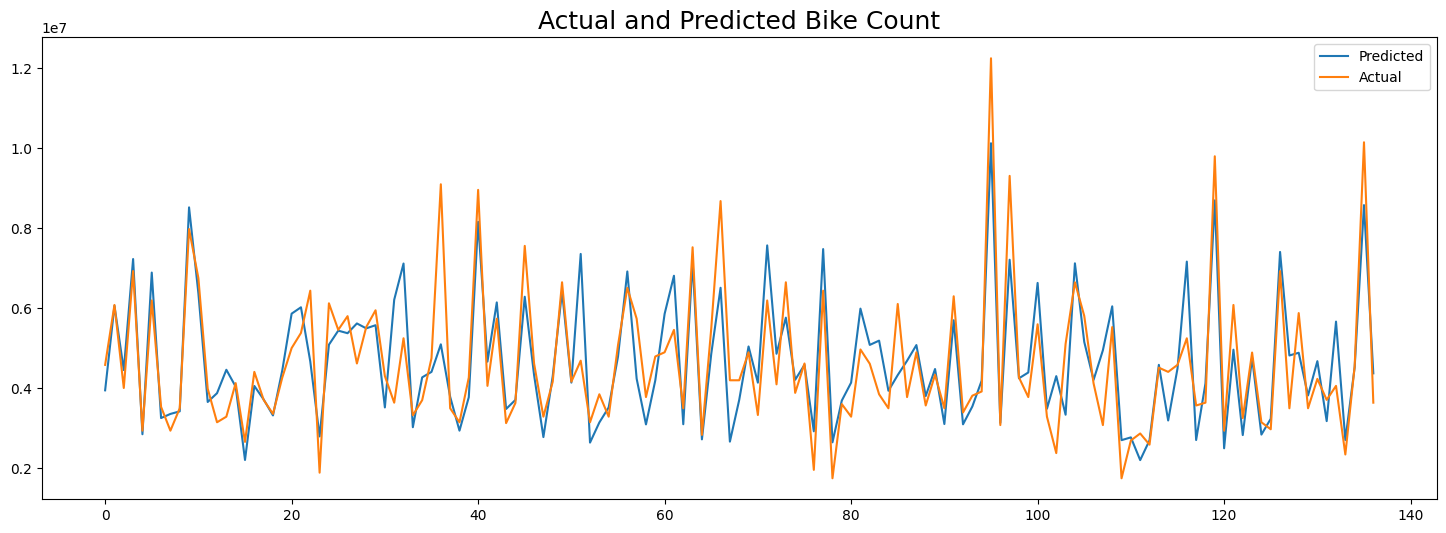

In [140]:
 #check the score
li_score = evaluate_model(regressor, y_test, y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = li_score

In [141]:
score

,Linear regression
MSE,8.896884e+11
RMSE,6.906032e+05
MAE,9.432330e+05
Train R2,6.836732e-01
Test R2,7.117471e-01
Adjusted R2,6.760133e-01


So, using linear regression model we have got accuracy(i.e R2 score) around 68% on train data and same 71% on test data. Which seems to low to predict on unseen data.

**Model 2 - Lasso Regression**

In [142]:
# Import the Lasso Regression class
lasso = Lasso()

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lasso1 = lasso.predict(X_test)

MSE : 884313308319.7488
RMSE : 940379.3427759613
MAE : 687706.876187469
Train R2 : 0.6834127646738233
Test R2 : 0.7134885911280839
Adjusted R2 :  0.6779706478794993


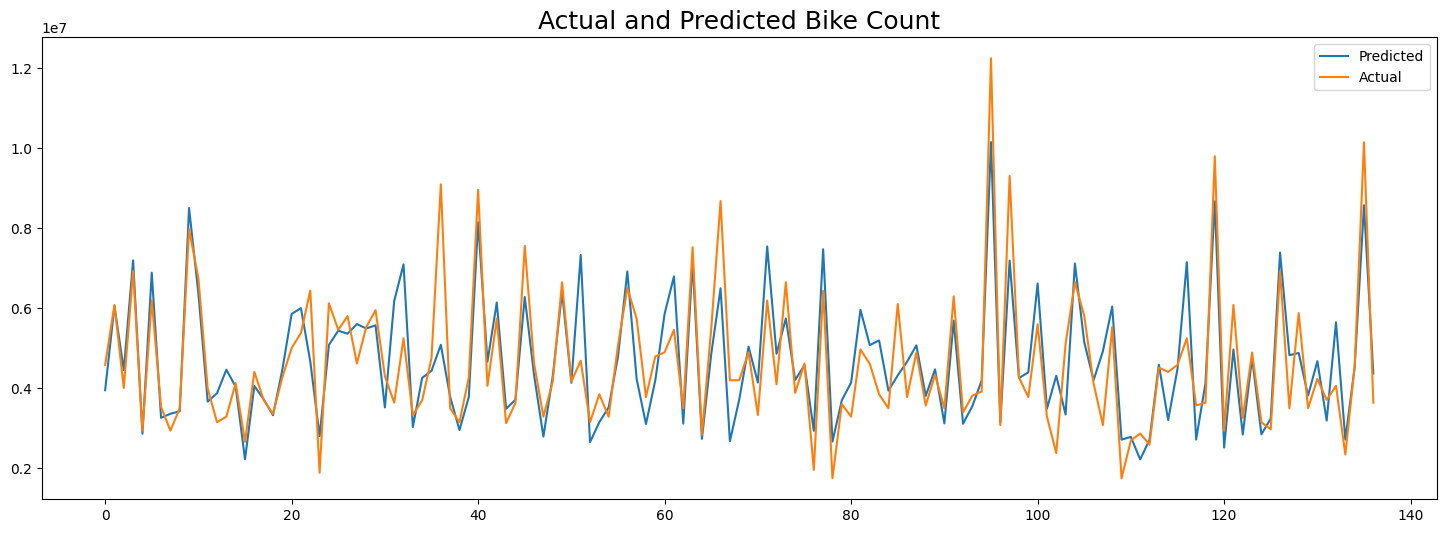

In [143]:
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [144]:
score

,Linear regression,Lasso regression
MSE,8.896884e+11,8.843133e+11
RMSE,6.906032e+05,6.877069e+05
MAE,9.432330e+05,9.403793e+05
Train R2,6.836732e-01,6.834128e-01
Test R2,7.117471e-01,7.134886e-01
Adjusted R2,6.760133e-01,6.779706e-01



**Model 2.1 - Lasso(tuned)**

In [145]:
#import Lasso regressor and grid search cv
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.083e+06, tolerance: 4.988e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.003e+06, tolerance: 5.802e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.629e+06, tolerance: 5.878e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [146]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -55733.40251295181


In [147]:

# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lassocv = lasso.predict(X_test)

MSE : 870974317158.0902
RMSE : 933260.047981317
MAE : 679542.3285585078
Train R2 : 0.6811819533262955
Test R2 : 0.7178103322063885
Adjusted R2 :  0.6828281419840398


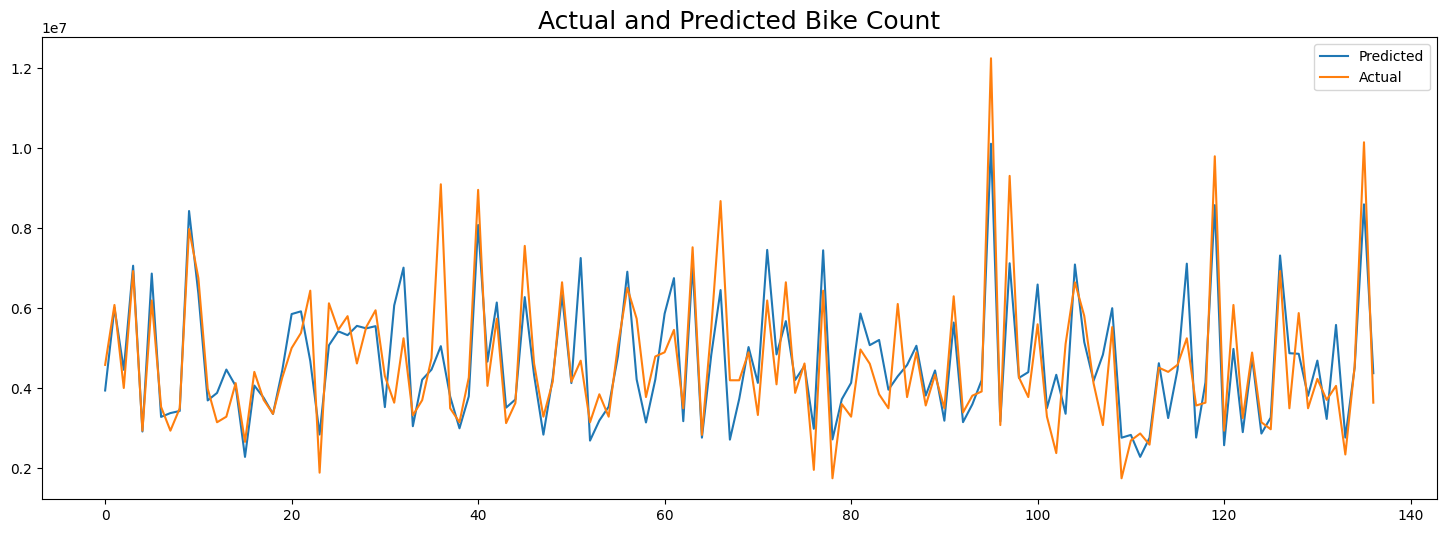

In [148]:

#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.


In [149]:
score


,Linear regression,Lasso regression,Lasso with alpha = 5
MSE,8.896884e+11,8.843133e+11,8.709743e+11
RMSE,6.906032e+05,6.877069e+05,6.795423e+05
MAE,9.432330e+05,9.403793e+05,9.332600e+05
Train R2,6.836732e-01,6.834128e-01,6.811820e-01
Test R2,7.117471e-01,7.134886e-01,7.178103e-01
Adjusted R2,6.760133e-01,6.779706e-01,6.828281e-01


**Model 3 - Ridge Regression**

In [150]:

# Ridge regressor class
ridge = Ridge()

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE : 889320601146.3802
RMSE : 943037.9637885106
MAE : 690371.2395369665
Train R2 : 0.6836272118895033
Test R2 : 0.7118662628097209
Adjusted R2 :  0.6761472044803474


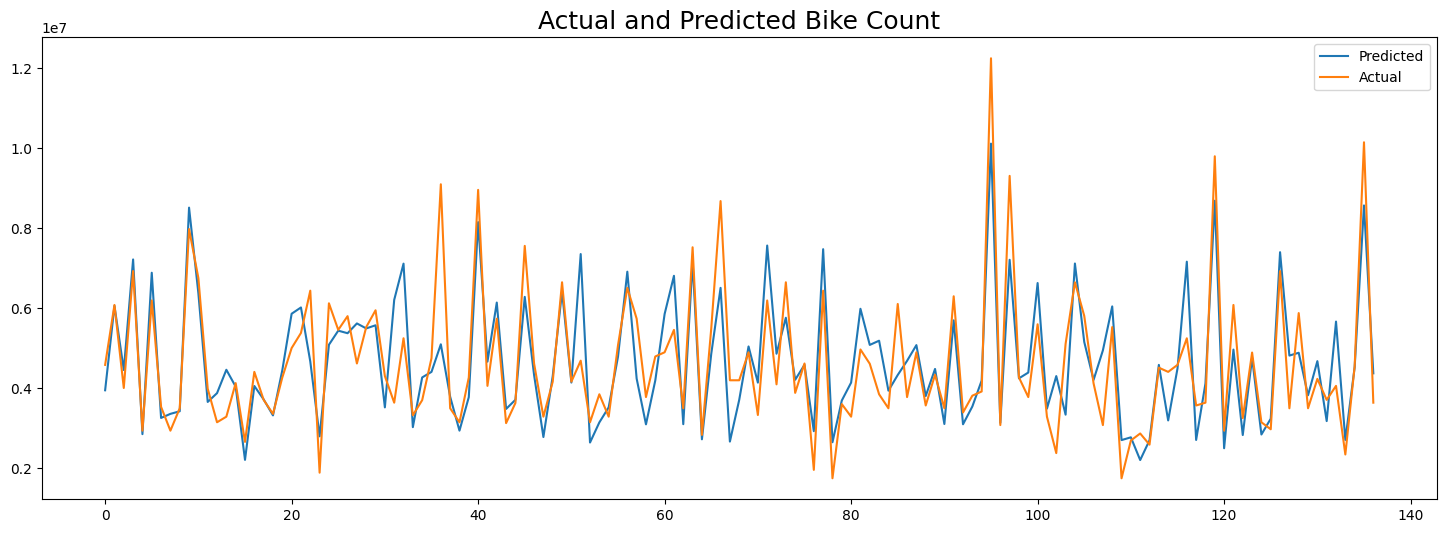

In [151]:
# Evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result


In [152]:
score

,Linear regression,Lasso regression,Lasso with alpha = 5,Ridge
MSE,8.896884e+11,8.843133e+11,8.709743e+11,8.893206e+11
RMSE,6.906032e+05,6.877069e+05,6.795423e+05,6.903712e+05
MAE,9.432330e+05,9.403793e+05,9.332600e+05,9.430380e+05
Train R2,6.836732e-01,6.834128e-01,6.811820e-01,6.836272e-01
Test R2,7.117471e-01,7.134886e-01,7.178103e-01,7.118663e-01
Adjusted R2,6.760133e-01,6.779706e-01,6.828281e-01,6.761472e-01


**Model 3.1 - Ridge(tuned)**

In [153]:
# Import Ridge regressor Class
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [154]:

#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -55740.01375335299


In [155]:

# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 885075248915.8077
RMSE : 940784.3796087431
MAE : 686157.7005975542
Train R2 : 0.6823133587513208
Test R2 : 0.7132417276334382
Adjusted R2 :  0.6776931814722942


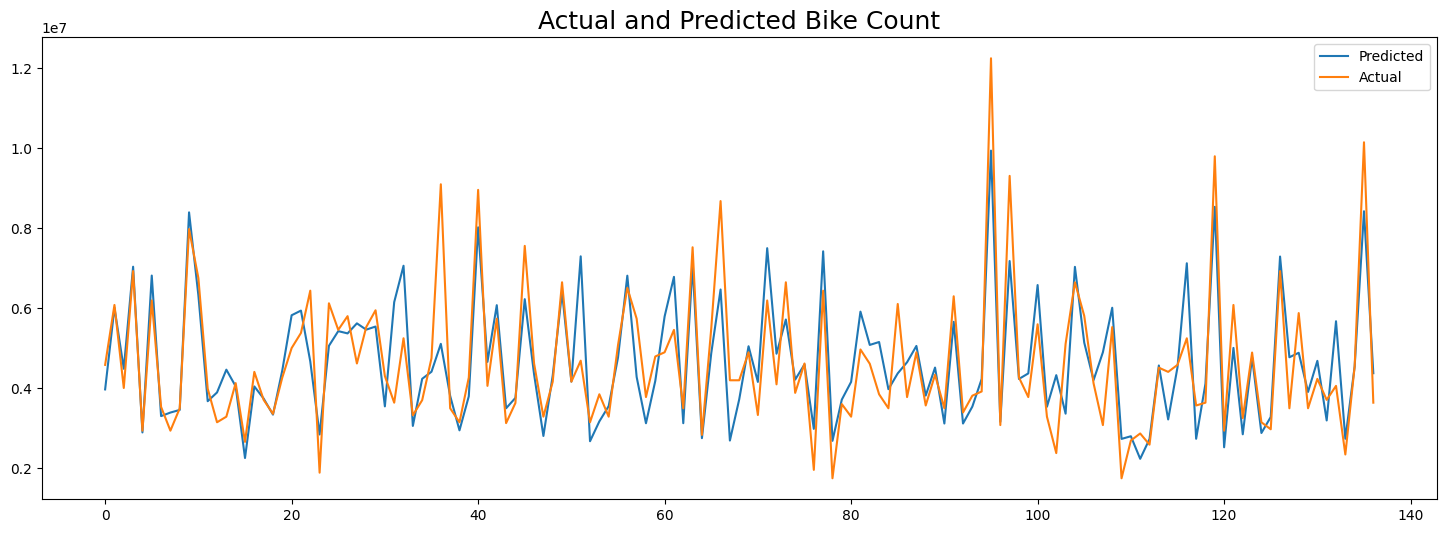

In [156]:

#Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

In [157]:
score

,Linear regression,Lasso regression,Lasso with alpha = 5,Ridge,Ridge with alpha = 20
MSE,8.896884e+11,8.843133e+11,8.709743e+11,8.893206e+11,8.850752e+11
RMSE,6.906032e+05,6.877069e+05,6.795423e+05,6.903712e+05,6.861577e+05
MAE,9.432330e+05,9.403793e+05,9.332600e+05,9.430380e+05,9.407844e+05
Train R2,6.836732e-01,6.834128e-01,6.811820e-01,6.836272e-01,6.823134e-01
Test R2,7.117471e-01,7.134886e-01,7.178103e-01,7.118663e-01,7.132417e-01
Adjusted R2,6.760133e-01,6.779706e-01,6.828281e-01,6.761472e-01,6.776932e-01


In [158]:
score.columns


Index(['Linear regression', 'Lasso regression', 'Lasso with alpha = 5',
       'Ridge', 'Ridge with alpha = 20'],
      dtype='object')

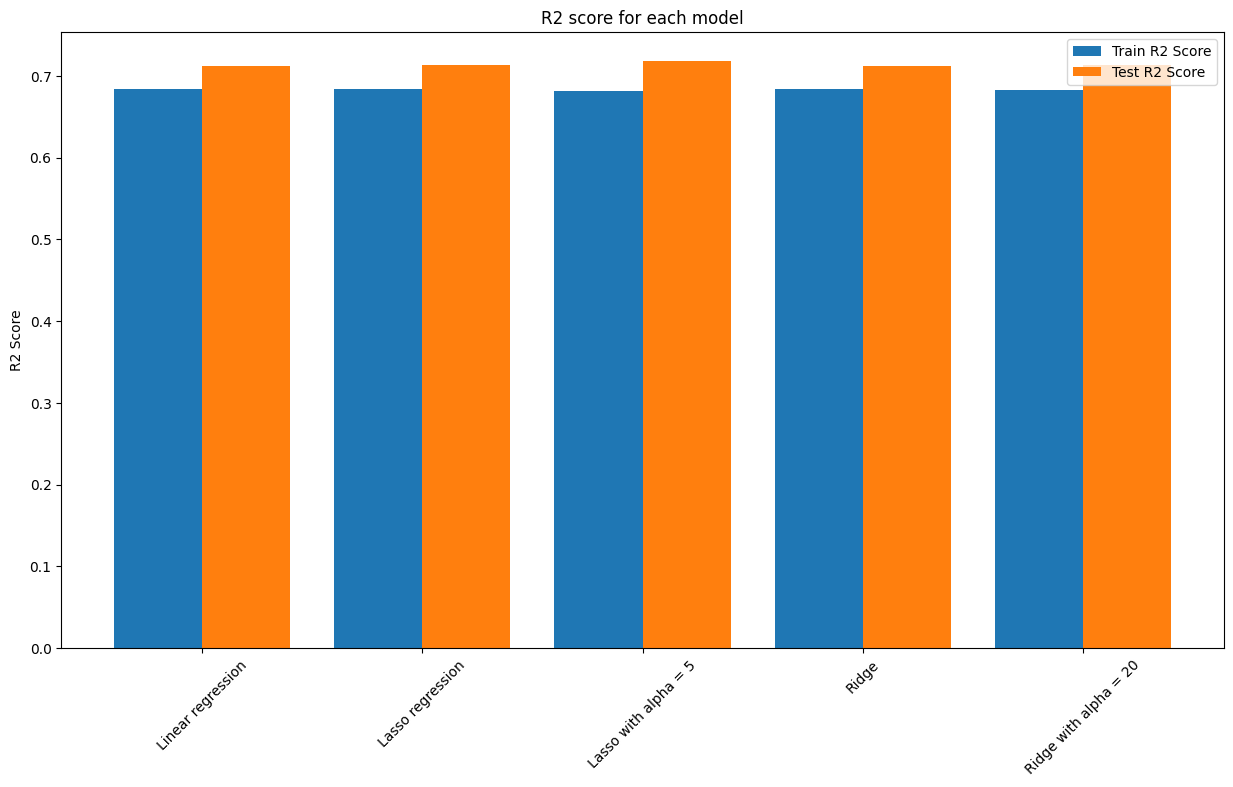

In [159]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(15,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=45)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()
